In [288]:
# Imports the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [289]:
# load the UsArrests dataset and create dataframes
df = pd.read_csv('UsArrests.csv')
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.20,236,58,21.20
1,Alaska,10.00,263,48,44.50
2,Arizona,8.10,294,80,31.00
3,Arkansas,8.80,190,50,19.50
4,California,9.00,276,91,40.60


In [290]:
print('Number of states: {}'.format(df.shape[0]))

Number of states: 50


In [291]:
# Count missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
City,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [292]:
#checks type of data in columns
df.dtypes

City         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

## EDA

In [293]:
#To set the decimal precision at 2 points in float format
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
# gives general info about data
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00,50.00,50.00,50.00
mean,7.79,170.76,65.54,21.23
std,4.36,83.34,14.47,9.37
min,0.80,45.00,32.00,7.30
25%,4.08,109.00,54.50,15.07
50%,7.25,159.00,66.00,20.10
75%,11.25,249.00,77.75,26.18
max,17.40,337.00,91.00,46.00


In [295]:
# sorting data into groups
states = df.City #states
homicide = df.sort_values(by=['Murder'], ascending=False) # max to min murders per 100,000 population
violent = df.sort_values(by=['Assault'], ascending=False) # max to min assaults per 100,000 population
sexual_abuse = df.sort_values(by=['Rape'], ascending=False) # max to min rapes per 100,000 population
pop_urban = df.sort_values(by=['UrbanPop'], ascending=False) # max to min urban population %
print(f"""Highest murders:
 {homicide.head()}
 Highest assaults:
 {violent.head()}
 Highest rapes:
 {sexual_abuse.head()}
 Highest urban population:
 {pop_urban.head()}""")

Highest murders:
               City  Murder  Assault  UrbanPop  Rape
9          Georgia   17.40      211        60 25.80
23     Mississippi   16.10      259        44 17.10
8          Florida   15.40      335        80 31.90
17       Louisiana   15.40      249        66 22.20
39  South Carolina   14.40      279        48 22.50
 Highest assaults:
               City  Murder  Assault  UrbanPop  Rape
32  North Carolina   13.00      337        45 16.10
8          Florida   15.40      335        80 31.90
19        Maryland   11.30      300        67 27.80
2          Arizona    8.10      294        80 31.00
30      New Mexico   11.40      285        70 32.10
 Highest rapes:
           City  Murder  Assault  UrbanPop  Rape
27      Nevada   12.20      252        81 46.00
1       Alaska   10.00      263        48 44.50
4   California    9.00      276        91 40.60
5     Colorado    7.90      204        78 38.70
21    Michigan   12.10      255        74 35.10
 Highest urban population:
      

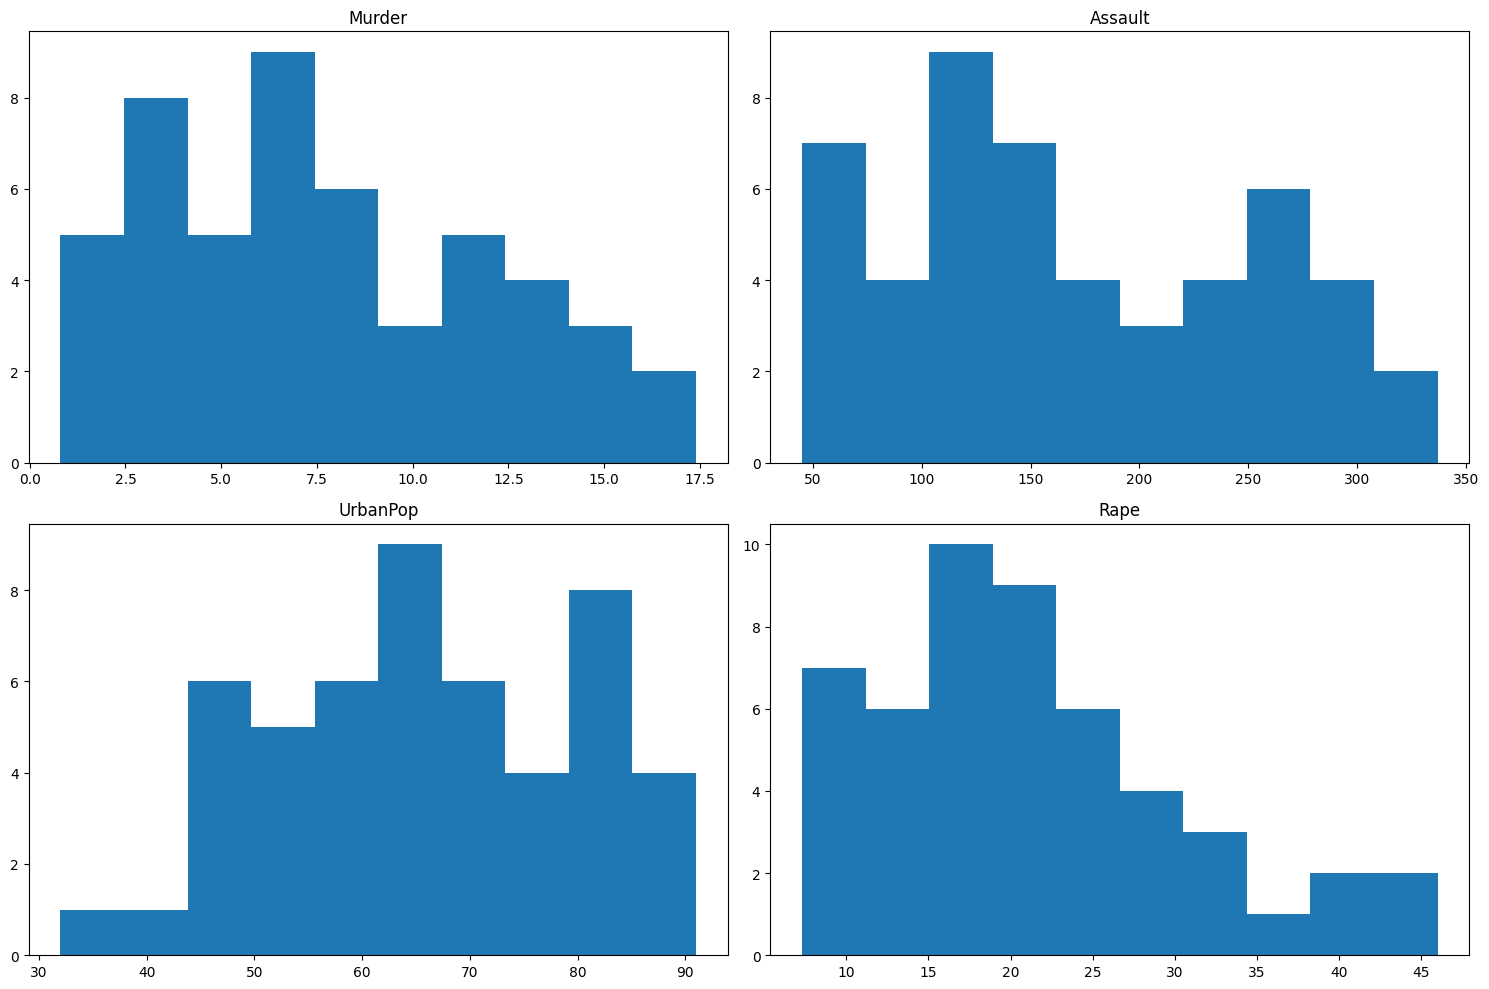

In [294]:
# Histograms will give a general idea on the distribution of crimes/arrests committed throughout the USA
# Plot histograms
histograms = df.hist(grid=False, figsize=(15, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()

In [296]:
# Plot six different scatter plots with the different combinations of the variables
sns.pairplot(df, hue = "City")
plt.show()
plt.close()

'# Plot six different scatter plots with the different combinations of the variables\nsns.pairplot(df, hue = "City")\nplt.show()\nplt.close()'

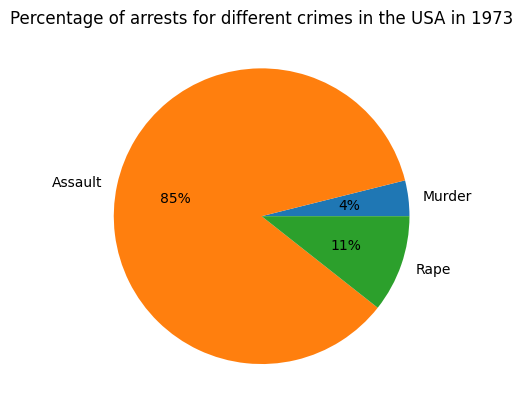

Murder     389.40
Assault   8538.00
Rape      1061.60
dtype: float64

In [297]:
# number of crimes committed/arrests for those crimes in all 50 states in 1973
no_crimes=df.drop(['City','UrbanPop'],axis=1).sum()
# pie chart for % arrests for specific crimes
plt.pie(no_crimes, labels = df.drop(['City','UrbanPop'],axis=1).columns, autopct='%.0f%%')
plt.title("Percentage of arrests for different crimes in the USA in 1973")
plt.show()
plt.close()
no_crimes

C:\Users\super\AppData\Local\Temp\ipykernel_6420\2920169007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


<AxesSubplot: >

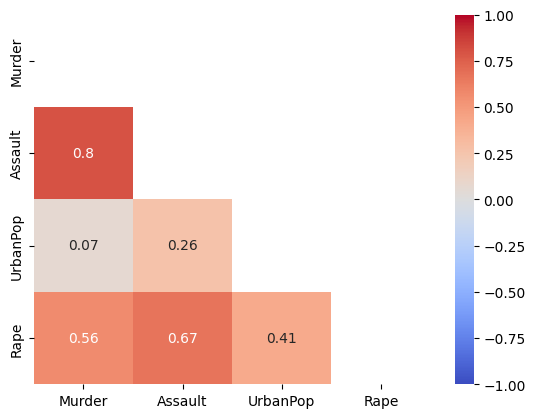

In [298]:
corr_df = df.corr()
labels =corr_df.columns

correlations = corr_df.corr()
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool_)
sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True,fmt='.2g', mask=mask_ut, cmap="coolwarm")